In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/sp500_closefull.csv

--2025-01-07 12:38:36--  https://lazyprogrammer.me/course_files/sp500_closefull.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18464866 (18M) [text/csv]
Saving to: ‘sp500_closefull.csv’

sp500_closefull.csv 100%[===================>]  17.61M  --.-KB/s    in 0.1s    

2025-01-07 12:38:37 (135 MB/s) - ‘sp500_closefull.csv’ saved [18464866/18464866]



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

import warnings
warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

In [ ]:
df0 = pd.read_csv('sp500_closefull.csv', index_col=0, parse_dates=True)
df0.dropna(axis=0, how='all', inplace=True)
df0.dropna(axis=1, how='any', inplace=True)

In [ ]:
df0.head()

,CSCO,UAL,TROW,ISRG,PRGO,TPR,DVN,MRO,BA,VRTX,...,M,CRM,PGR,WAT,BWA,LRCX,NWL,UAA,BLK,PPL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,24.690001,12.80,54.400002,102.923332,40.349998,36.310001,76.570000,19.153616,56.180000,44.240002,...,17.059999,18.705000,18.030001,61.630001,16.889999,39.880001,15.20,3.51000,238.580002,30.242558
2010-01-05,24.580000,13.91,55.009998,102.459999,38.790001,36.750000,76.650002,19.171511,58.020000,42.779999,...,16.860001,18.625000,17.969999,60.790001,17.695000,39.610001,15.11,3.61500,239.610001,29.851370
2010-01-06,24.420000,13.27,54.150002,103.946663,38.299999,37.470001,76.419998,19.595024,59.779999,42.029999,...,17.100000,18.592501,17.790001,60.900002,18.344999,39.430000,15.38,3.69500,234.669998,29.916569
2010-01-07,24.530001,13.55,54.110001,103.556664,37.990002,37.490002,75.970001,19.475725,62.200001,41.500000,...,17.490000,18.510000,17.549999,61.160000,18.594999,39.360001,15.82,3.65125,237.250000,29.627834
2010-01-08,24.660000,13.33,53.900002,102.986664,37.779999,37.270000,76.120003,19.505550,61.599998,40.669998,...,16.920000,18.537500,17.709999,61.209999,18.254999,40.349998,15.77,3.64375,238.919998,29.534695


In [ ]:
df0.shape

(2263, 429)

In [ ]:
df_returns = pd.DataFrame()
for name in df0.columns:
  df_returns[name] = np.log(df0[name]).diff()

In [ ]:
df_returns.head()

,CSCO,UAL,TROW,ISRG,PRGO,TPR,DVN,MRO,BA,VRTX,...,M,CRM,PGR,WAT,BWA,LRCX,NWL,UAA,BLK,PPL
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,-0.004465,0.083163,0.011151,-0.004512,-0.039429,0.012045,0.001044,0.000934,0.032227,-0.033559,...,-0.011793,-0.004286,-0.003333,-0.013723,0.046560,-0.006793,-0.005939,0.029476,0.004308,-0.013019
2010-01-06,-0.006531,-0.047102,-0.015757,0.014405,-0.012713,0.019402,-0.003005,0.021850,0.029883,-0.017687,...,0.014134,-0.001746,-0.010067,0.001808,0.036075,-0.004555,0.017711,0.021889,-0.020832,0.002182
2010-01-07,0.004494,0.020881,-0.000739,-0.003759,-0.008127,0.000534,-0.005906,-0.006107,0.039684,-0.012690,...,0.022551,-0.004447,-0.013583,0.004260,0.013536,-0.001777,0.028207,-0.011911,0.010934,-0.009698
2010-01-08,0.005286,-0.016369,-0.003889,-0.005519,-0.005543,-0.005886,0.001973,0.001530,-0.009693,-0.020203,...,-0.033133,0.001485,0.009075,0.000817,-0.018454,0.024841,-0.003166,-0.002056,0.007014,-0.003149


In [ ]:
# split into train and test
Ntest = 1000
train_data = df_returns.iloc[:-Ntest]
test_data = df_returns.iloc[-Ntest:]

In [ ]:
feats = ['AAPL', 'MSFT', 'AMZN']

In [ ]:
df_returns['SPY'].describe()

,SPY
count,2262.000000
mean,0.000346
std,0.009447
min,-0.067341
25%,-0.003475
50%,0.000542
75%,0.005057
max,0.049290


In [ ]:
class Env:
  def __init__(self, df):
    self.df = df
    self.n = len(df)
    self.current_idx = 0
    self.action_space = [0, 1, 2] # BUY, SELL, HOLD
    self.invested = 0

    self.states = self.df[feats].to_numpy()
    self.rewards = self.df['SPY'].to_numpy()

  def reset(self):
    self.current_idx = 0
    return self.states[self.current_idx]

  def _reward(self, stock_return):
    # für extrembereiche - hohe bzw niedrige reward werte geben (-1000 wenn ganz schlecht und +222, wenn sehr gut)
    # mittelmässig einfach stock_return so lassen wie es ist
    '''
    count    2262.000000
    mean        0.000346
    std         0.009447
    min        -0.067341
    25%        -0.003475
    50%         0.000542
    75%         0.005057
    max         0.049290
    '''
    # Aufgabe Teil 1
    if -1 < stock_return <=0.: # schlechte performance, 0 ist log(1), d.h. when keine Veräderung ggü dem Vortag stattfand, d.h. kurs am vortag = dem aktuallen kurs log(return_ts1/return_ts_0) = log(1)
      reward = - 100
    elif 1. <= stock_return < 1.5: # gute performance Werte finden für Boundaries
      reward = 100
    elif stock_return >=1.5: # sehr gute
      reward = 400
    else: #mittelmässige performance
      reward = stock_return


    return reward




  def step(self, action):
    # need to return (next_state, reward, done)
    # move forward
    self.current_idx += 1
    if self.current_idx >= self.n:
      raise Exception("Episode already done")

    if action == 0: # BUY
      self.invested = 1
    elif action == 1: # SELL
      self.invested = 0

    # compute reward
    if self.invested:

      #reward = self._reward(self.rewards[self.current_idx])
      reward = self.rewards[self.current_idx]
    else:
      reward = 0

    # state transition
    next_state = self.states[self.current_idx]

    done = (self.current_idx == self.n - 1)
    return next_state, reward, done

In [ ]:
class Agent:
  def __init__(self, action_size):
    self.action_size = action_size
    # mehrere modelle
    # Trajektorien - ExpReplayBuffer
    ### je nach Technologie

  def act(self, state): # observes the state and decides


    return np.random.choice(self.action_size)

  def train(self, state, action, reward, next_state, done):
    pass

In [ ]:
def play_one_episode(agent, env, is_train):
  state = env.reset()
  done = False
  total_reward = 0

  while not done:
    action = agent.act(state)
    next_state, reward, done = env.step(action)
    total_reward += reward
    if is_train:
      agent.train(state, action, reward, next_state, done)
    state = next_state

  return total_reward

In [ ]:
num_episodes = 10

In [ ]:
train_env = Env(train_data)
test_env = Env(test_data)

In [ ]:
train_env.step(1)
train_env.reset()
train_env.current_idx

0

In [ ]:
action_size = len(train_env.action_space)
agent = Agent(action_size)

In [ ]:
train_rewards = np.empty(num_episodes)
test_rewards = np.empty(num_episodes)

In [ ]:
for e in range(num_episodes):
  r = play_one_episode(agent, train_env, is_train=True)
  train_rewards[e] = r

  # test on the test set
  tr = play_one_episode(agent, test_env, is_train=False)
  test_rewards[e] = tr

  print(f"eps: {e + 1}/{num_episodes}, train: {r:.5f}, test: {tr:.5f}")

eps: 1/10, train: 0.37032, test: 0.15573
eps: 2/10, train: 0.11932, test: -0.06280
eps: 3/10, train: 0.17687, test: 0.36716
eps: 4/10, train: 0.30275, test: 0.09945
eps: 5/10, train: 0.40535, test: 0.00092
eps: 6/10, train: 0.10243, test: 0.14878
eps: 7/10, train: 0.39188, test: -0.16817
eps: 8/10, train: 0.16658, test: -0.00722
eps: 9/10, train: 0.24176, test: 0.11638
eps: 10/10, train: 0.01560, test: 0.06133


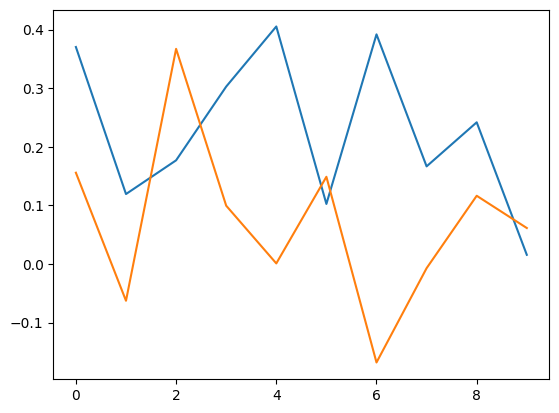

In [ ]:
plt.plot(train_rewards)
plt.plot(test_rewards);